In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_system import linear_system

In [2]:
Ts = 10E-3
fs = 1.0/Ts
t_start = 0
t_end = 300
t_sim = np.arange(t_start,t_end, Ts)
gamma = 5

Gp = linear_system(b=np.array([1]), a=np.array([1,1,1]), sampling_rate=fs)

Wm = linear_system(b=np.array([1]), a=np.array([1,2,1]), sampling_rate=fs)

Fu = linear_system(b=np.array([1]), a=np.array([1,1]), sampling_rate=fs)

Fy = linear_system(b=np.array([1]), a=np.array([1,1]), sampling_rate=fs)

Fzetar = linear_system(b=np.array([1]), a=np.array([1,1]), sampling_rate=fs)

Fzetay = linear_system(b=np.array([1]), a=np.array([1,1]), sampling_rate=fs)

FzetaFu = linear_system(b=np.array([1]), a=np.array([1,1]), sampling_rate=fs)

FzetaFy = linear_system(b=np.array([1]), a=np.array([1,1]), sampling_rate=fs)

In [3]:
Gp.set_null_state()
Fu.set_null_state()
Fy.set_null_state()
Fzetar.set_null_state()
Fzetay.set_null_state()
FzetaFu.set_null_state()
FzetaFy.set_null_state()

input_signal = np.sign(np.sin(2*np.pi*t_sim/20))
ym,_ = Wm.simulate_zoh(input_signal, np.zeros(2))

N_states = 4
omegay = 0
omegaFu = 0
omegaFy = 0
theta = np.array([1.1, -0.1, -1.1, 1.2])
y_history = np.zeros(len(t_sim))
states_history = np.zeros((N_states,len(t_sim)))
P = 1*np.eye(N_states)

for i in range(len(t_sim)):
    states_history[:,i] = theta
    omega = np.array([input_signal[i], omegay, omegaFu, omegaFy])
    u = theta@omega
    
    omegaFu = Fu.iterate_zoh(u)
    omegay = Gp.iterate_zoh(u)
    omegaFy = Fy.iterate_zoh(omegay)

    y_history[i] = omegay
    zeta = np.array([Fzetar.iterate_zoh(input_signal[i]), Fzetay.iterate_zoh(omegay), FzetaFu.iterate_zoh(omegaFu), FzetaFy.iterate_zoh(omegaFy)])
    m2 = 1+ zeta@zeta
    error = omegay - ym[i]
    epsilon = error + theta@zeta - omegaFu
    theta = (np.eye(N_states) - Ts*epsilon*P/m2)@theta - (Ts*epsilon/m2)*(P@zeta)
    P = P - (Ts/m2) *np.outer(P@zeta,P@zeta)

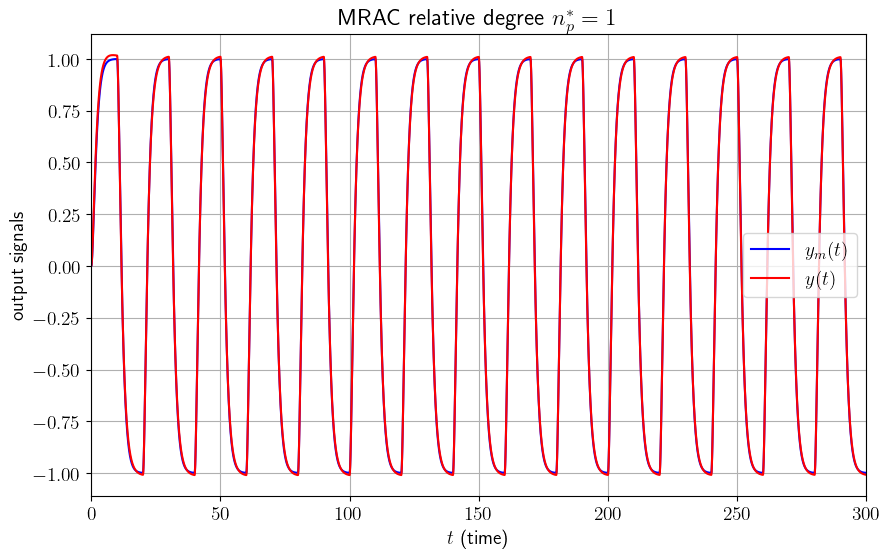

In [4]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
plt.plot(t_sim, ym, 'b', label=r'$y_m(t)$')
plt.plot(t_sim, y_history, 'r', label=r'$y(t)$')
plt.legend(loc='best')
#plt.plot([t_init, t_end], [bm/bp,bm/bp],'b:')
#plt.plot([t_init, t_end], [(am-ap)/bp,(am-ap)/bp],'r:')
plt.xlabel(r'$t$ (time)')
plt.ylabel(r'output signals')
plt.title(r'MRAC relative degree $n_p^*=1$')
plt.grid(True,'both')
plt.xlim([t_start, t_end])
plt.show()

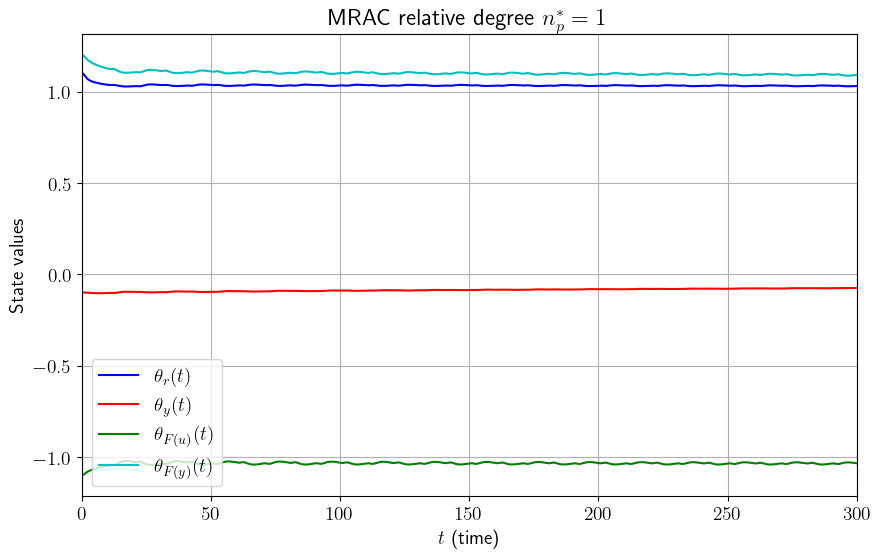

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t_sim, states_history[0,:], 'b', label=r'$\theta_r(t)$')
plt.plot(t_sim, states_history[1,:], 'r', label=r'$\theta_y(t)$')
plt.plot(t_sim, states_history[2,:], 'g', label=r'$\theta_{F(u)}(t)$')
plt.plot(t_sim, states_history[3,:], 'c', label=r'$\theta_{F(y)}(t)$')
plt.legend(loc='best')
#plt.plot([t_init, t_end], [bm/bp,bm/bp],'b:')
#plt.plot([t_init, t_end], [(am-ap)/bp,(am-ap)/bp],'r:')
plt.xlabel(r'$t$ (time)')
plt.ylabel(r'State values')
plt.title(r'MRAC relative degree $n_p^*=1$')
plt.grid(True,'both')
plt.xlim([t_start, t_end])
plt.show()